In [4]:
from pathlib import Path
from Datagen import train_test
import numpy as np
import time
# from Compile_the_data import train_test_for_pca
from Compile_the_data import dataset_for_classic
from Compile_the_data import train_test_for_pca_and_classic

from matplotlib import pyplot as plt
%matplotlib inline

#To do: Add clustarization to make prediction

In [5]:
from ensemble_model import ensemble_models

SyntaxError: invalid syntax (ensemble_model.py, line 258)

In [3]:
paths = [
    Path("img5_stripes/2/"),
    Path("img5_stripes/3/"),
        Path("img4_stripes/")
]

In [52]:
def condition(a):
    # based on dataset inspection plots
    return (0.120 > a) & (a > 0.105)

In [53]:
params_net = {"max_size": 1,
              "min_size": 1,
              "min_features" : 0.5,
              "max_features" : 1,
              "max_epoches" : 300,
              "min_epoches" : 250,
              "Batches" : [5, 3],
              "lr" : [1e-3]
}

params_classic = {"max_size": 1,
                  "min_size": 0.5,
                  "h" : [ 0.0001, 0.0002]
}

params_tree = {"max_size": 1,
               "min_size": 0.5,
               "min_features" : 0.5,
               "max_features" : 1,
               "lr" : [1.01], 
               "max_depth" : [80, 100], 
               "n_estimators" : [100, 150, 50]
}



In [54]:
start = 0.45
end = 0.65
n_classics= 5
n_neural= 10
n_forests= 5

In [55]:
BATCH=5
N_COMPONENTS = 50
train_test_sp = train_test_for_pca_and_classic(paths, N_COMPONENTS, filtered = condition) ## train_test(...) for average data
train_dataset, test_dataset = train_test_sp.get()

In [56]:
train_target_classic = [train_dataset.target for i in range(len(train_dataset.inten))]
test_target_classic = [test_dataset.target for i in range(len(test_dataset.inten))]

train_classic = [train_target_classic, train_dataset.inten]
test_classic = [test_target_classic, test_dataset.inten]

In [57]:
ensemble = ensemble_models(n_classics= n_classics, n_neural= n_neural, n_forests= n_forests, 
                           params_net = params_net, params_classic = params_classic, 
                           params_tree = params_tree, start = start, end = end)

In [58]:
ensemble.fit(train_classic, train_dataset)

Starting classical fitting

Finished classical fitting:
 It took 0'11.

Starting machine learning

Starting train 1 model



/Users/maxim/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


---------------------------------------

Finished train 1 model. It took 3:33'1.

Starting train 2 model

---------------------------------------

Finished train 2 model. It took 2:2'80.

Starting train 3 model

---------------------------------------

Finished train 3 model. It took 2:18'19.

Starting train 4 model

---------------------------------------

Finished train 4 model. It took 3:16'10.

Starting train 5 model

---------------------------------------

Finished train 5 model. It took 2:24'8.

Starting train 6 model

---------------------------------------

Finished train 6 model. It took 3:26'50.

Starting train 7 model

---------------------------------------

Finished train 7 model. It took 3:41'28.

Starting train 8 model

---------------------------------------

Finished train 8 model. It took 3:9'9.

Starting train 9 model

---------------------------------------

Finished train 9 model. It took 3:13'1.

Starting train 10 model

---------------------------------------

F

In [59]:
start_time = time.time()
prediction, pred = ensemble.predict(test_classic[1], test_dataset, method = "cluster")
end_time = time.time()

/Users/maxim/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [60]:
end_time - start_time

19.82888126373291

Text(0.5, 1.0, 'Ensemble: n_classics = 5, n_neural = 10, n_trees = 5')

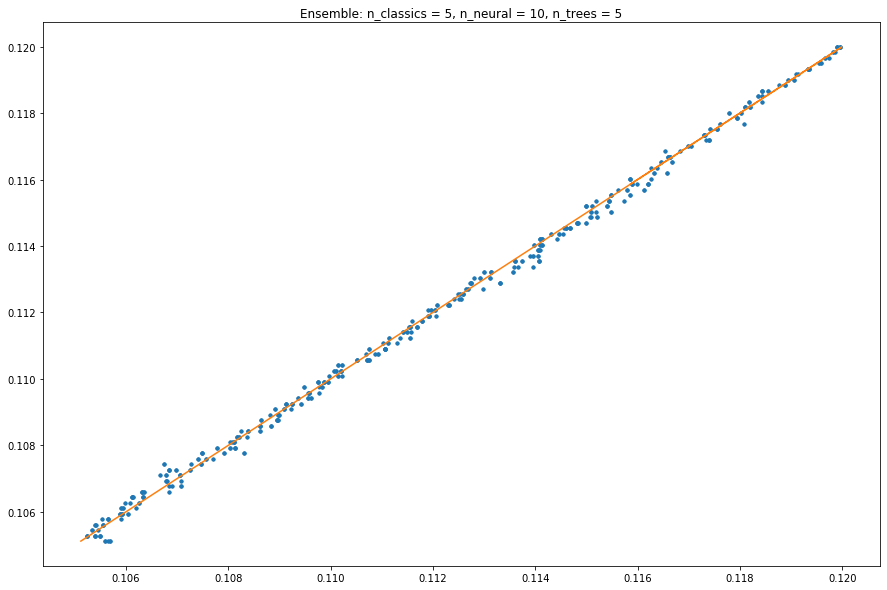

In [61]:
fig = plt.figure(figsize = (15, 10))
plt.plot(pred, test_dataset.target, '.')
plt.plot(test_dataset.target, test_dataset.target)
plt.title("Ensemble: n_classics = {}, n_neural = {}, n_trees = {}".format(n_classics, n_neural, n_forests))

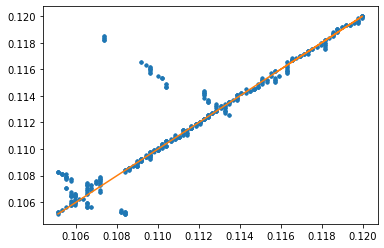

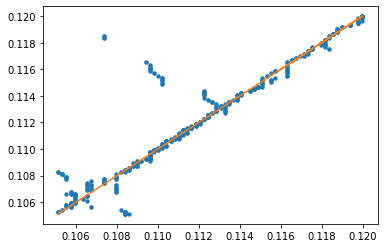

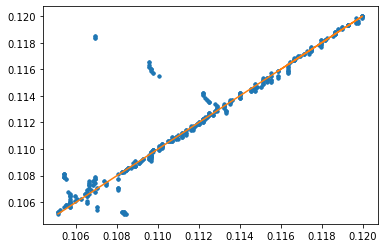

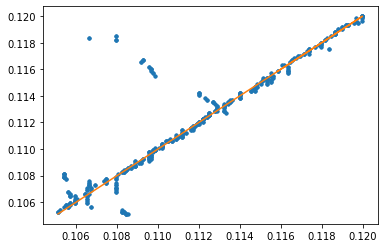

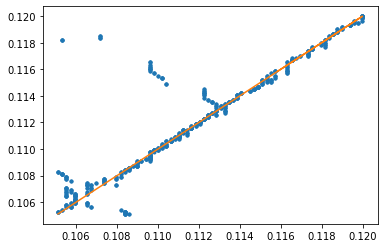

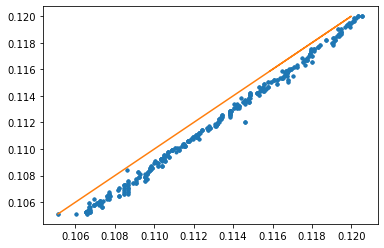

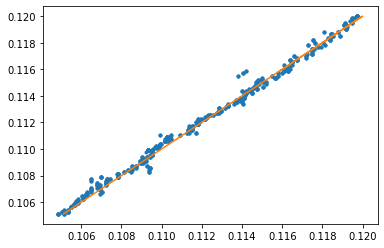

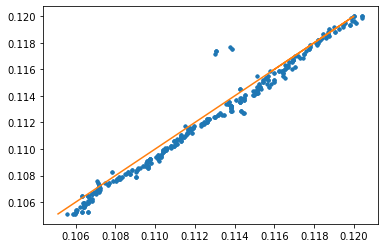

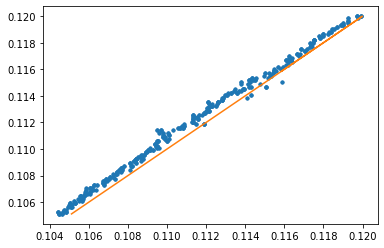

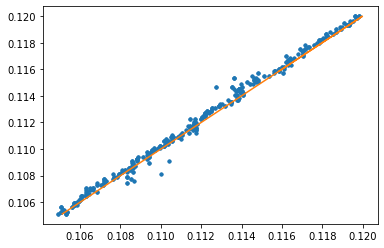

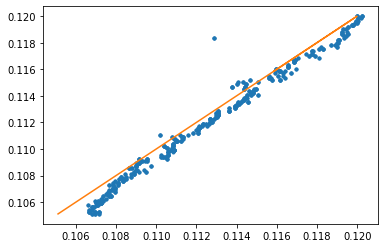

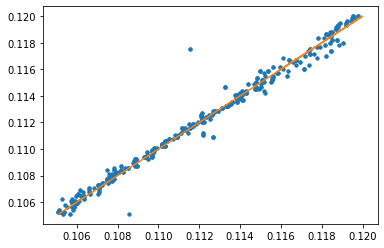

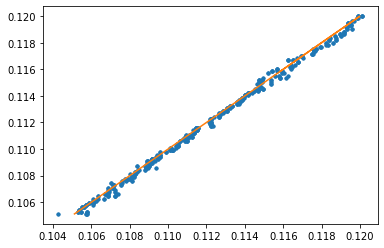

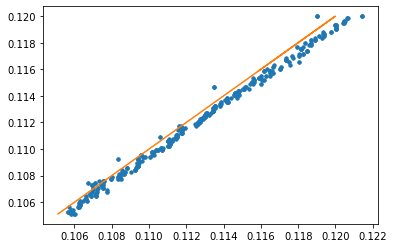

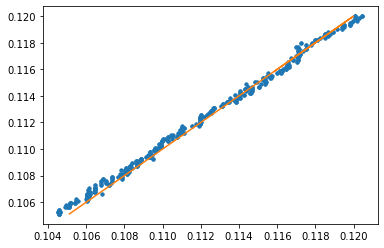

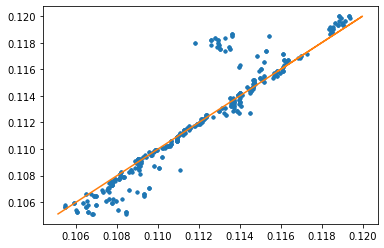

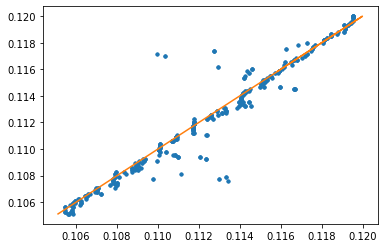

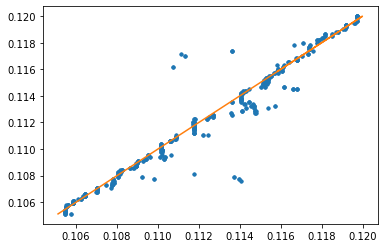

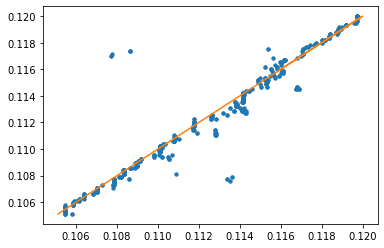

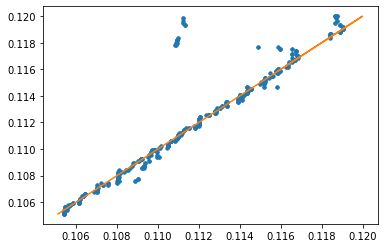

In [62]:
for i in range(len(prediction)):
    plt.plot(prediction[i], test_dataset.target, '.')
    plt.plot(test_dataset.target, test_dataset.target)
    plt.show()

In [63]:
import numpy as np

In [64]:
np.corrcoef(pred, test_dataset.target)[0][1]

0.9990540095921848

In [65]:
(abs(pred-test_dataset.target)/test_dataset.target).max()

0.006498908795197467

# Record:
cor = 0.99940

$\epsilon = 0.649 \%$

# Examine PCA


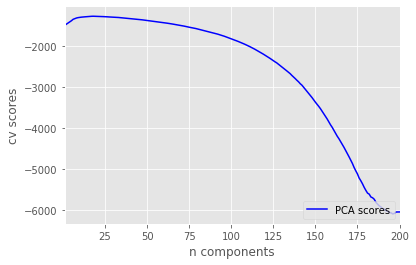

In [24]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    

        
data = train_dataset.images

D = len(data[0])

d_scores = []

for i in range(D):
    model = PCA(n_components=i+1)
    scores = cv_score(model, data, cv = 3)
    d_scores.append(scores.mean())
plot_scores(np.array(d_scores))

In [25]:
d_scores = np.array(d_scores)

In [26]:
np.where(d_scores == d_scores.max())

(array([17]),)

# Let's look at data

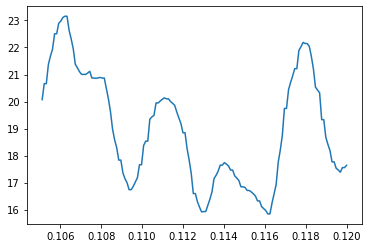

In [40]:
plt.plot(ensemble.models[0].phis, ensemble.models[0].mu[1])